In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import cv2 as cv
import mediapipe as mp
import handTrackingModule as htm

In [5]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input, Activation
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [6]:
trainFile = "sign_mnist_train.csv"
testFile = "sign_mnist_test.csv"

Epoch 1/6
301/301 [==============================] - 16s 52ms/step - loss: 1.4451 - accuracy: 0.5516 - val_loss: 0.4006 - val_accuracy: 0.8641
Epoch 2/6
301/301 [==============================] - 17s 55ms/step - loss: 0.1879 - accuracy: 0.9430 - val_loss: 0.0662 - val_accuracy: 0.9834
Epoch 3/6
301/301 [==============================] - 18s 59ms/step - loss: 0.0444 - accuracy: 0.9893 - val_loss: 0.0230 - val_accuracy: 0.9968
Epoch 4/6
301/301 [==============================] - 18s 61ms/step - loss: 0.0147 - accuracy: 0.9977 - val_loss: 0.0048 - val_accuracy: 0.9998
Epoch 5/6
301/301 [==============================] - 19s 62ms/step - loss: 0.0084 - accuracy: 0.9986 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 6/6
301/301 [==============================] - 18s 61ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0657 - val_accuracy: 0.9813


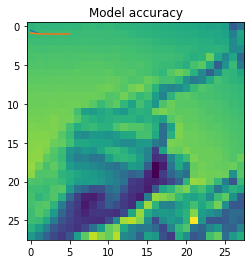

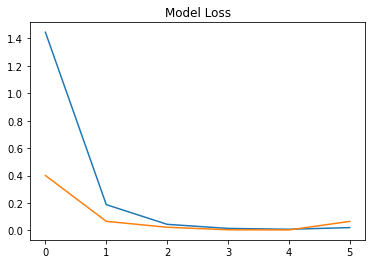

In [7]:
df = pd.read_csv(trainFile)
#  remove this comment
train = df.values[0:, 1:]
labels = df.values[0:, 0]
labels = to_categorical(labels)
sample = train[1]
plt.imshow(sample.reshape((28, 28)))
train = train/255
train = train.reshape((27455, 28, 28, 1))
plt.imshow(train[1].reshape((28, 28)))
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(25, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(train, labels, validation_split=0.3, epochs=6, batch_size=64)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.show()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.show()

In [48]:
frameWidth = 640
frameHeight = 480
brightness = 180
threshold = 0.90
font = cv.FONT_HERSHEY_SIMPLEX

In [49]:
cap = cv.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

True

In [33]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
def grayscale(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

In [25]:
def equalize(img):
    img = cv.equalizeHist(img)
    return img

In [26]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [44]:
def getClassName(classNo):
    if classNo == 15:
        return "You Signed A!"
    elif classNo == 22:
        return "You Signed B!"
    elif classNo == 2:
        return "You Signed C!"
    elif classNo == 3:
        return "You Signed D!"
    elif classNo == 4:
        return "You Signed E!"
    elif classNo == 5:
        return "You Signed F!"
    elif classNo == 6:
        return "You Signed G!"
    elif classNo == 7:
        return "You Signed H!"
    elif classNo == 8:
        return "You Signed I!"
    elif classNo == 9:
        return "You Signed K!"
    elif classNo == 10:
        return "You Signed L!"
    elif classNo == 11:
        return "You Signed M!"
    elif classNo == 12:
        return "You Signed N!"
    elif classNo == 13:
        return "You Signed O!"
    elif classNo == 14:
        return "You Signed P!"
    elif classNo == 0:
        return "You Signed Q!"
    elif classNo == 16:
        return "You Signed R!"
    elif classNo == 17:
        return "You Signed S!"
    elif classNo == 18:
        return "You Signed T!"
    elif classNo == 19:
        return "You Signed U!"
    elif classNo == 20:
        return "You Signed V!"
    elif classNo == 21:
        return "You Signed W!"
    elif classNo == 22:
        return "You Signed X!"
    elif classNo == 1:
        return "You Signed Y!"
    else:
        return "You Haven't Signed."
    

In [50]:
while True:
    success, imgOriginal = cap.read()
    #imgOriginal = (cv.flip(imgOriginal, 1))
    
    
    img = np.asarray(imgOriginal)
    imgOriginal = (cv.flip(imgOriginal, 1))
    img = cv.resize(img, (28, 28))
    img = preprocessing(img)
    cv.imshow("Processed Image", img)
    img_tensor = img.reshape(1, 28, 28, 1)
    cv.putText(imgOriginal, "CLASS: ", (20,35), font, 0.75, (0,0,255), 2, cv.LINE_AA)
    cv.putText(imgOriginal,"PROBABILITY: ", (20,75), font, 0.75, (255,0,0), 2, cv.LINE_AA)
    
    predictions = model.predict(img_tensor)
    classIndex = predictions.argmax(axis=-1)
    #classIndex = model.predict_classes(img)
    probabilityValue = np.amax(predictions)
    if probabilityValue > threshold:
        cv.putText(imgOriginal, str(classIndex)+" "+str(getClassName(classIndex)), (120,35), font, 0.75, (0,0,255), 2, cv.LINE_AA)
        cv.putText(imgOriginal, str(round(probabilityValue*100, 2)), (180,75), font, 0.75, (255,0,0), 2, cv.LINE_AA)
        
    cv.imshow("Picture", imgOriginal)
    cv.imshow("Result", img)
    
    key = cv.waitKey(1)
    if key in [27, ord('Q'), ord('q')]:
        break
        
cap.release()
cv.destroyAllWindows() 